# Supervised Learning - Foundations Project: ReCell 
### Full Code Version
#### Fallaye Diallo
## Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
## Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
## Data Description
The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.

**Data Dictionary**

- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries and data

In [1]:
#Needed Libraries for reading and manipulating data
import numpy as np
import pandas as pd

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Data Overview

- Observations
- Sanity checks

In [2]:
data = pd.read_csv("used_device_data.csv")
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns.')  # f-string

# now let's look at 10 random rows
# Let's set the random seed via np.random.seed so that
# I get the same random results every time
np.random.seed(1)
data.sample(n=10)

There are 3454 rows and 15 columns.


,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
866,Others,Android,15.24,no,no,8.00,2.0,16.0,4.00,3000.0,206.0,2014,632,4.038832,5.190788
957,Celkon,Android,10.16,no,no,3.15,0.3,512.0,0.25,1400.0,140.0,2013,637,2.800325,3.884652
280,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.00,5000.0,185.0,2020,329,4.370713,4.487287
2150,Oppo,Android,12.83,yes,no,13.00,16.0,64.0,4.00,3200.0,148.0,2017,648,4.677863,5.639422
93,LG,Android,15.29,yes,no,13.00,5.0,32.0,3.00,3500.0,179.0,2019,216,4.517650,5.300415
1040,Gionee,Android,12.83,yes,no,13.00,8.0,32.0,4.00,3150.0,166.0,2016,970,4.645640,5.634325
3170,ZTE,Others,10.16,no,no,3.15,5.0,16.0,4.00,1400.0,125.0,2014,1007,3.764451,4.244344
2742,Sony,Android,12.70,yes,no,20.70,2.0,16.0,4.00,3000.0,170.0,2013,1060,4.422809,5.799820
102,Meizu,Android,15.29,yes,no,NaN,20.0,128.0,6.00,3600.0,165.0,2019,332,4.959412,6.040659
1195,HTC,Android,10.29,no,no,8.00,2.0,32.0,4.00,2000.0,146.0,2015,892,4.227855,4.879007


#### Observations : 
the data has 3454 rows and 15 columns.

In [3]:
#Let's create a copy of the data to avoid changes to the original data
df = data.copy()

In [4]:
#Let's get information (column name, datatypes) about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

#### Observation : 
The majority of the colums are in float data type, 2 columns are in Interger data type, and the remaining 4 are in object data type.

In [5]:
#Let's check for duplicates in the data
df[df.duplicated()]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price


#### Observation:
The data is not displaying the presence of any duplicate.

In [6]:
# looking at which columns have the most missing values
df.isnull().sum().sort_values(ascending=False)

main_camera_mp           179
weight                     7
battery                    6
int_memory                 4
ram                        4
selfie_camera_mp           2
brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

#### Observation:
6 columns have missing values on the data with the highest being the column main_camera_mp.

In [7]:
df.describe().T  # quick summary of numeric features

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


#### Observation:
We can observe the statiscal summary of all the numerical columns on the data here. We just to be careful when interpreting the release_year column summary to not confuse it with enumarated values.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

### Univariate Analysis

In [8]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [9]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### brand name

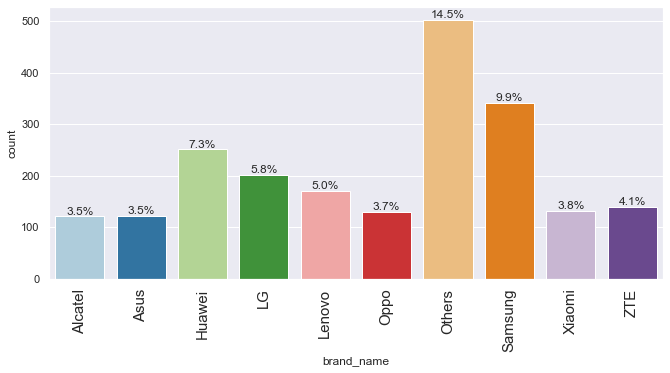

In [10]:
labeled_barplot(df, "brand_name", perc=True, n=10) # Code to create labeled barplot for brand name

#### Observation:
The most used brands in the market are in Others (not specified), Samsungs devices are the second most used with 9.9% of the market. Huawei has 7%, LG devices are 5.8% of the market, the rest of the brands are % and below.

### os

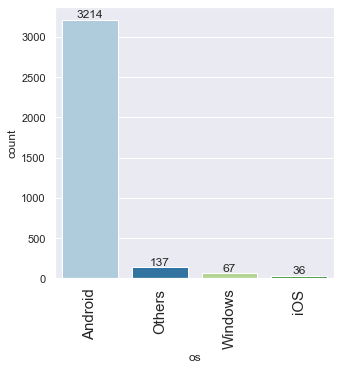

In [11]:
labeled_barplot(df, 'os') #code to create labeled_barplot for os

#### Observation:
Android system devices are the most used by far with more than 90% of the devices being on that system.

### Screen size

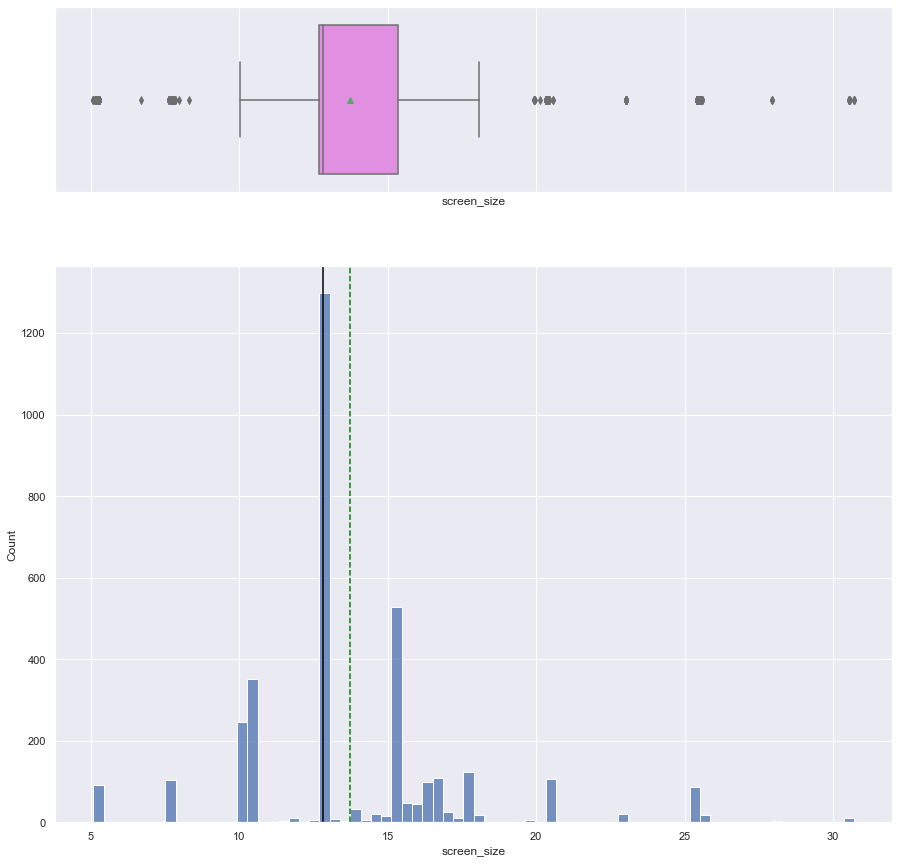

In [12]:
histogram_boxplot(df, 'screen_size', figsize= (15, 15))  #code to create histogram_boxplot for screen size

#### Observation:
When it comes to screen sizes the data is spread but this tells us that devices with screen size between 10 cm and 20cm are the most pruchased.

### 4g

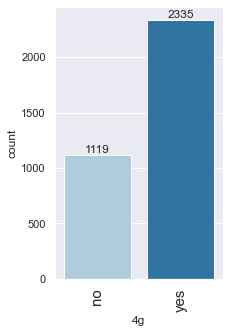

In [13]:
labeled_barplot(df, "4g") #labeled_barplot for '4g'

#### Observation:
2335 of the devices have at least 4g performence, which seems to attract customers.

### 5g

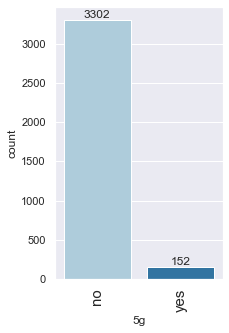

In [14]:
labeled_barplot(df,"5g") # code to create labeled_barplot for '5g'

#### Observation:
Only 152 of the devices have 5g functionality in them. higher perfomance when it comes to speed. this functionality might drive the price of devices up.

### main camera mp

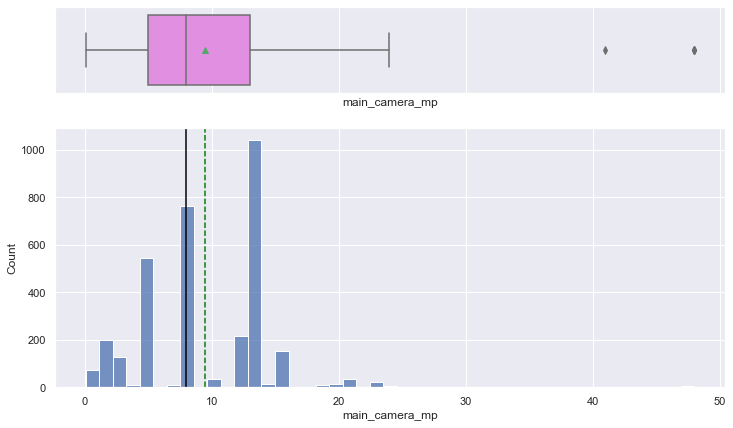

In [15]:
histogram_boxplot(df, 'main_camera_mp')  #code to create histogram plot for main camera mp

#### Observation:
higher Camera performance acts on the decision of the device purchase, we can see here that customers are more attracted to devices that have high pixels.

### Selfie camera mp

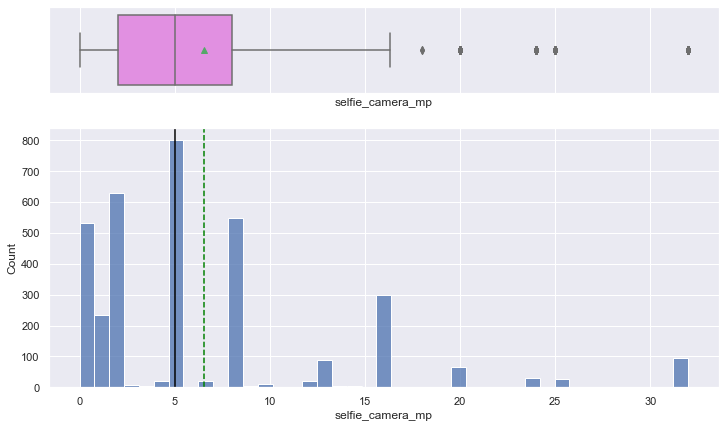

In [16]:
histogram_boxplot(df, 'selfie_camera_mp')  #code to create histogram and boxplot for selfie_camera_mp

#### Observation:
Selfie cameras also seems to be a decision driven functionality where 5 mp is the standars. this camera functionality could be lower than the main camera's in the customer decision making.

### Int memory

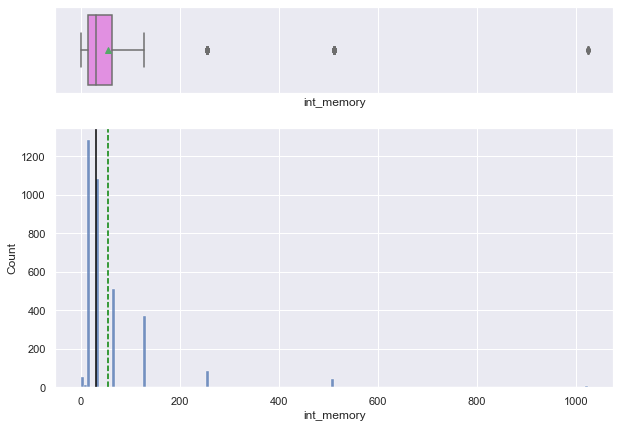

In [17]:
histogram_boxplot(df, 'int_memory', figsize=(10,7))  #code to create histogram and boxplot for int_memory

#### Observation:
The memory of the phone is right skewed on the data where most of the data lies between 0 and 100. 

### ram

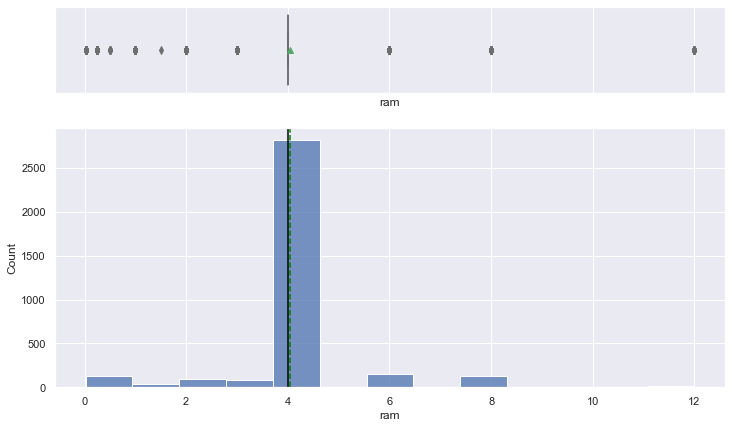

In [18]:
histogram_boxplot(df, 'ram')  #code to create histogram and boxplot for ram

#### Observation:
Ram size of 4 and above dominates the market as this functionality drives the speed of the device it is also a decision making point of the data.

### battery

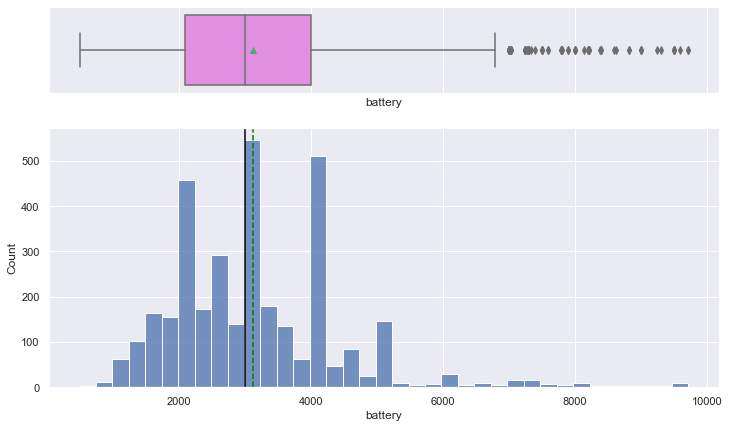

In [19]:
histogram_boxplot(df, 'battery')  #code to create histogram and boxplot for battery

#### Observation:
The battery performance is also a big decision making point on the sale process, could be plus in the way where big batteries attract customers but it could be factor in the weight.

### Weight

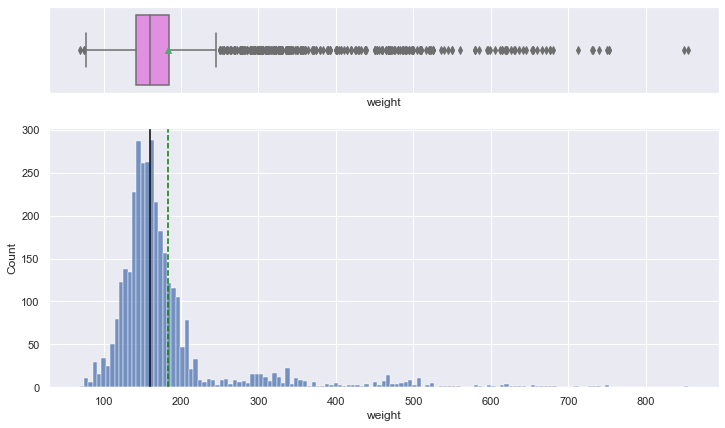

In [20]:
histogram_boxplot(df, 'weight')  #code to create histogram and boxplot for weight

#### Observation:
This data is right skewed in a way where most customers like light devices.

In [21]:
# let's apply the log transform to see if we can make the distribution of weight closer to normal
df["log_weight"] = np.log(df["weight"])

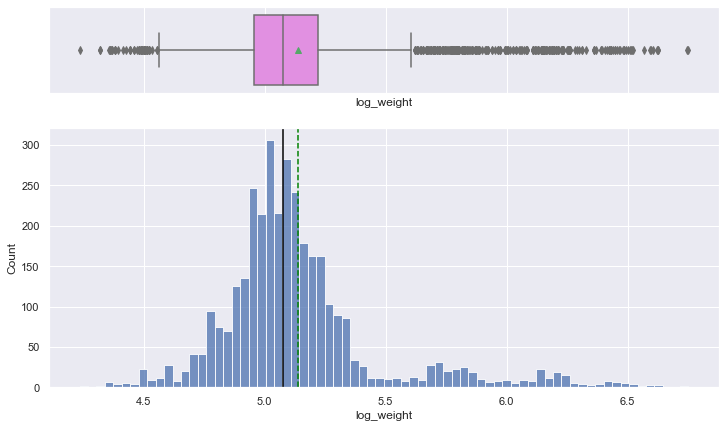

In [22]:
histogram_boxplot(df, 'log_weight')  # code to create histogram_boxplot for log_weight

#### Observation:
after treatment on the weight data, it is still slightly right skewed.

In [23]:
df.drop('log_weight', axis=1, inplace=True)

### release year

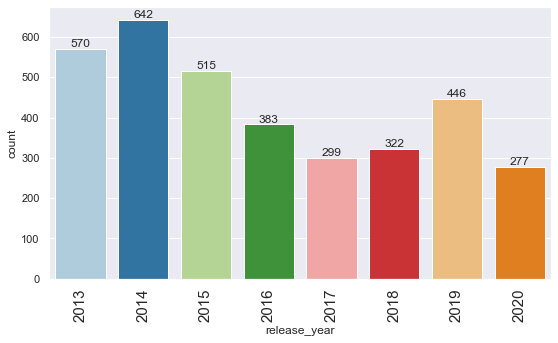

In [24]:
labeled_barplot(df, 'release_year') #code to create labeled_barplot for release_year

#### Observation
2014 was the year that highest amount was made, follow by 2013, and 2015. All of the phones are less than 10 years old.

### days used

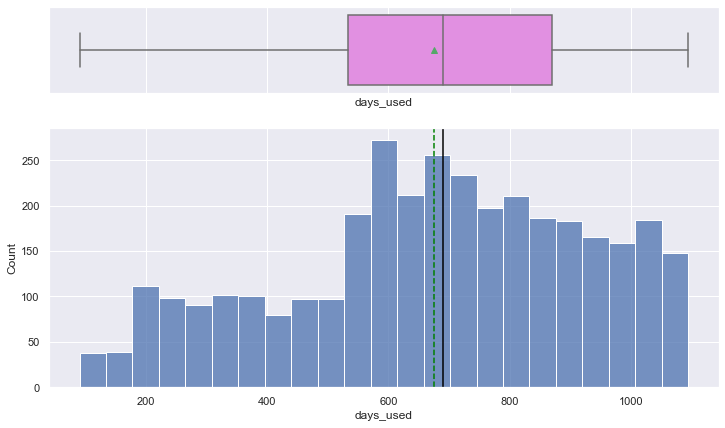

In [25]:
histogram_boxplot(df,'days_used')  #code to create histogram and boxplot for days_used

#### Observation:
Most of the phones have been used at least more than 2 years, which could be a pricing factor as well.

### normalized used price

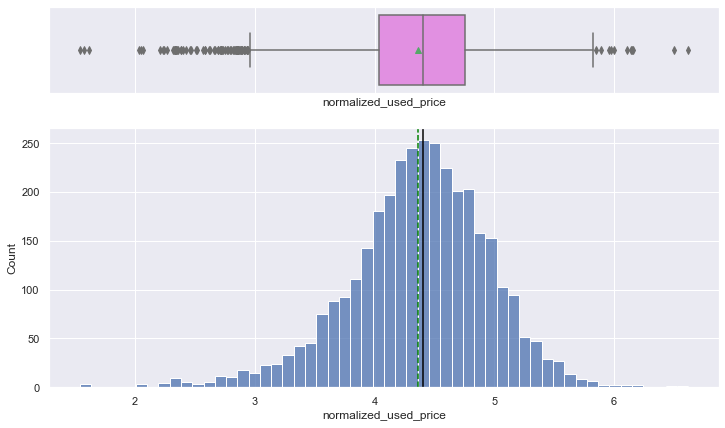

In [26]:
histogram_boxplot(df, "normalized_used_price") ## code to create histogram and boxplot for normalized_used_price

#### Observatrion:
The data for normalized used devices price is almost normal. which could indicate a fairness in the pricing.

### normalized_new_price

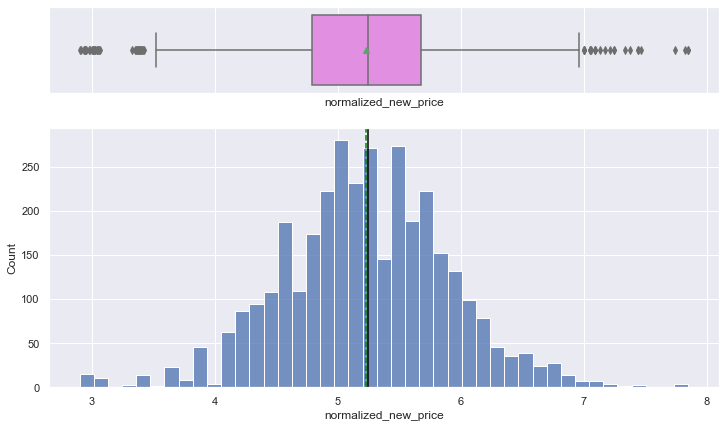

In [27]:
histogram_boxplot(df, 'normalized_new_price')  #code to create histogram_boxplot for normalized_new_price

#### Observation
The normalized new price is showing a higher trend than the used ones.

### Bivariate Analysis

#### release_year is a time related variable it needs to be dropped

In [28]:
# dropping release_year as it is a time related variable
cols_list = df.select_dtypes(include=np.number).columns.tolist()
cols_list.remove("release_year")

### Correlation heatmap

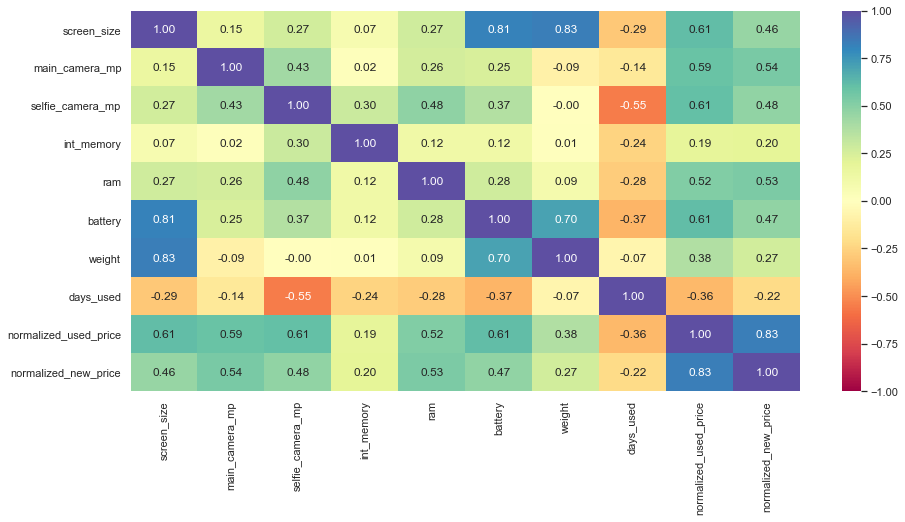

In [29]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### Observation
The correlations between features and pricing are slightly noticeable but not alarming.

### Since RAM is important in the performance of the phone. let's see how it relates to the brands

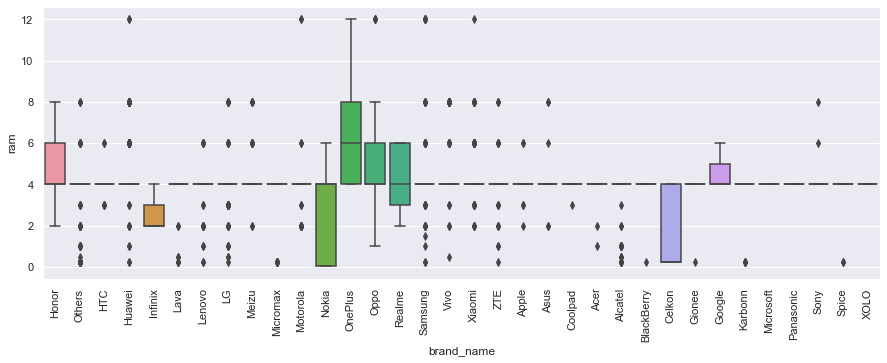

In [30]:
#let's plot brand name and ram to see the relations 
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

#### Observation:
The ram distribution is not uniform accross the brands. brands with higher ram size could attract more customer.

### Battery size

In [31]:
df_large_battery = df[df.battery > 4500]
df_large_battery.shape

(341, 15)

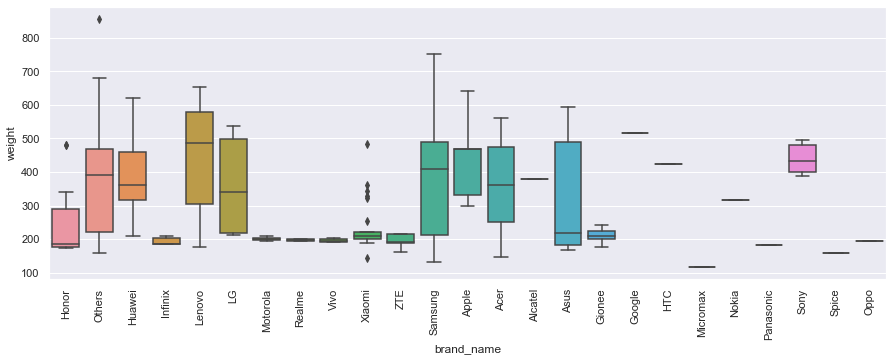

In [32]:
plt.figure(figsize=(15, 5))
sns.boxplot(data= df_large_battery, x= "brand_name", y='weight' ) ## Complete the code to create a boxplot for 'brand_name' and 'weight'
plt.xticks(rotation=90)
plt.show()

#### Observation
The weight distribution is not uniform as well as this feature is a sale driving feature, therefore weight might be a factor to take in cosideration on the sale decisions.

### People who buy phones and tablets primarily for entertainment purposes prefer a large screen as they offer a better viewing experience. Let's create a new dataframe of only those devices which are suitable for such people and analyze.

In [33]:
df_large_screen = df[df.screen_size > 6 * 2.54]
df_large_screen.shape

(1099, 15)

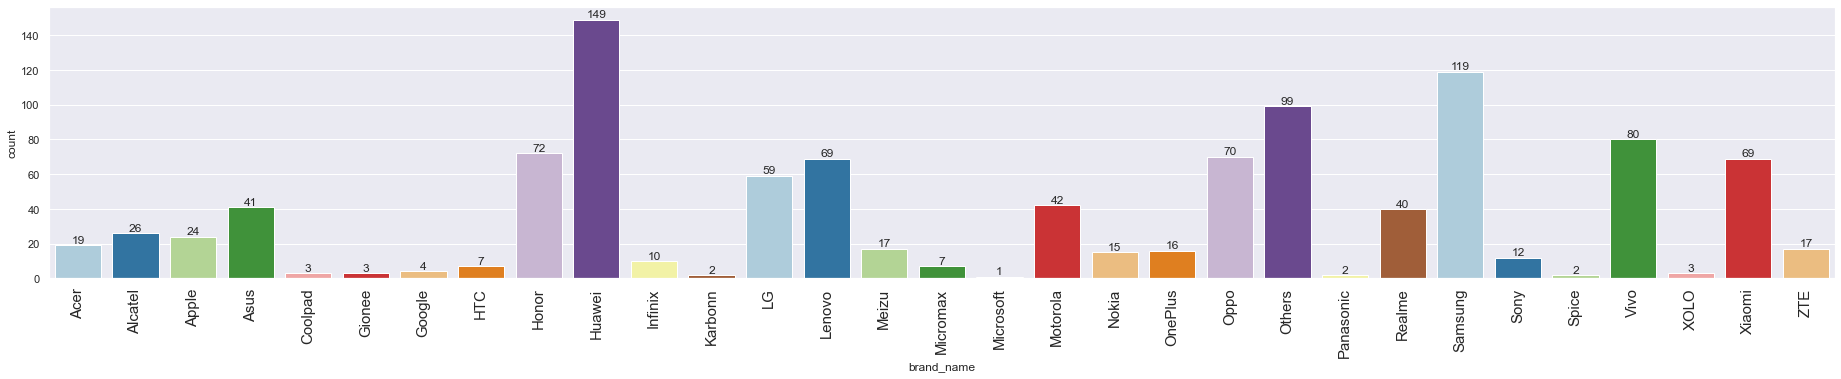

In [34]:
labeled_barplot(df_large_screen,'brand_name') ## Complete the code to create labeled_barplot for 'brand_name' in large screen dataframe

#### Observation
the screen size seem to be a good attraction feature for sale as well. As the most purchased devices have a large enough screen.

### Everyone likes a good camera to capture their favorite moments with loved ones. Some customers specifically look for good front cameras to click cool selfies. Let's create a new dataframe of only those devices which are suitable for this customer segment and analyze.

In [35]:
df_selfie_camera = df[df.selfie_camera_mp > 8]
df_selfie_camera.shape

(655, 15)

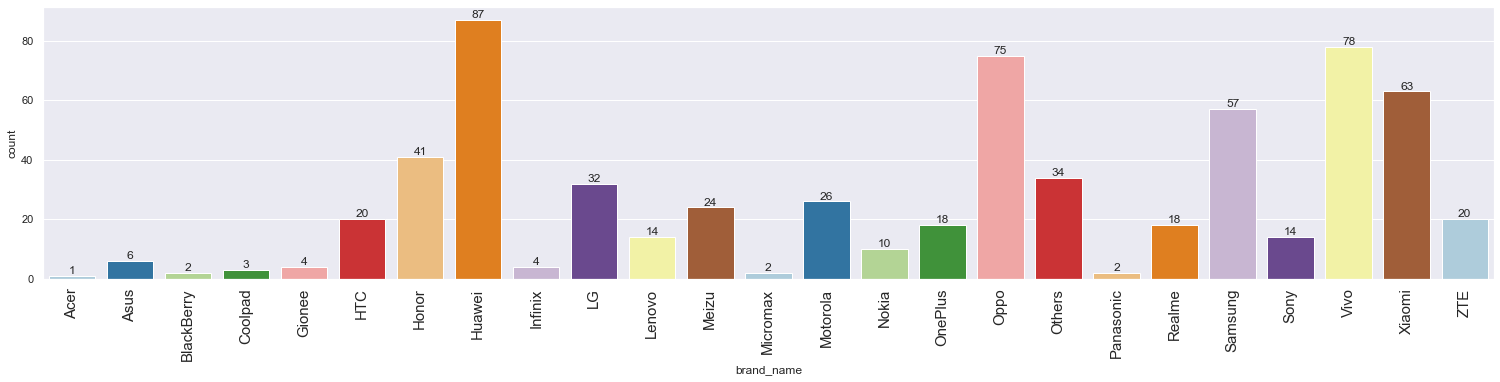

In [36]:
labeled_barplot(df_selfie_camera, 'brand_name') ## Complete the code to create labeled_barplot for 'brand_name' in high selfie camera dataframe

#### Observation
selfie camera also has a good pull on customer decision making, it shows on the data the most sold devices have a good selfie camera.

### Let's do a similar analysis for rear cameras.

Rear cameras generally have a better resolution than front cameras, so we set the threshold higher for them at 16MP.

In [37]:
df_main_camera = df[df.main_camera_mp > 16]
df_main_camera.shape

(94, 15)

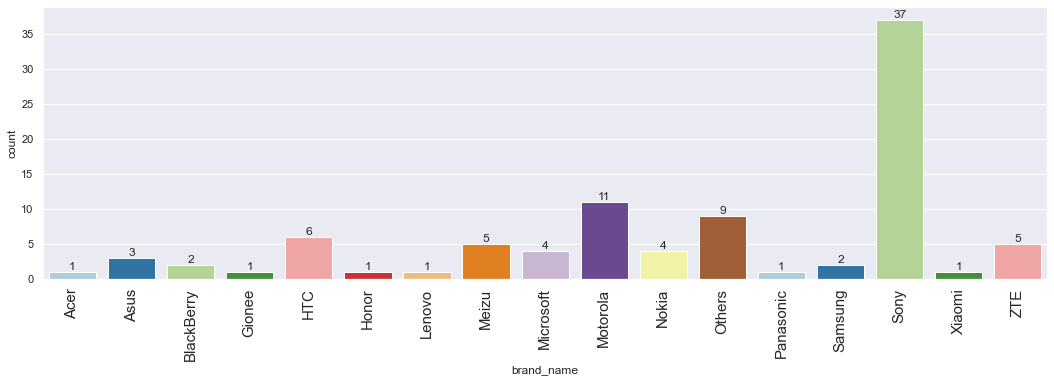

In [38]:
labeled_barplot(df_main_camera, 'brand_name') ## Complete the code to create labeled_barplot for 'brand_name' in high main camera dataframe

#### Observation
Rear camera seems not be as an attractive feature to impact sales that much.

### Price of used devices accross the year

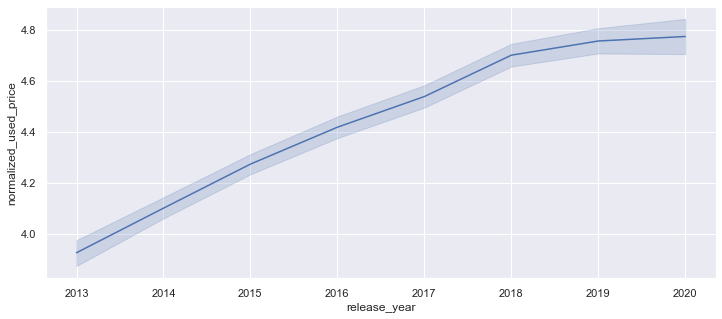

In [39]:
plt.figure(figsize=(12, 5))
sns.lineplot(data= df, x='release_year',y='normalized_used_price') ## Complete the code to create a lineplot for release year and used price
plt.show()

#### Observation
The price for used devices has been increasing through the years, this could be the results of many factors such inflation, cost of phone parts etc...

### Let's check how the prices vary for used phones and tablets offering 4G and 5G networks.

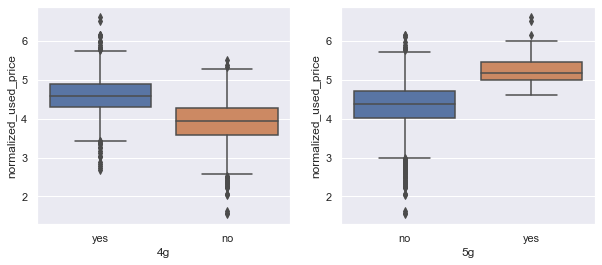

In [40]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.boxplot(data=df, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=df, x="5g", y="normalized_used_price")

plt.show()

#### Observation
The functionality of 5g and 4g are high driving price features. their presence on a device drives the price higher than the others. 

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing Value Treatment

In [41]:
# let's create a copy of the data
df1 = df.copy()

In [42]:
# checking for missing values
df1.isnull().sum().sort_values(ascending=False) ## Complete the code to check missing values in all the columns

main_camera_mp           179
weight                     7
battery                    6
int_memory                 4
ram                        4
selfie_camera_mp           2
brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

Let's Treat this missing values by imputing the median

In [43]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1.groupby('release_year', axis=0)[col].transform(
        lambda x: x.fillna(x.median())
    )   ## Complete the code to impute missing values in cols_impute with median by grouping the data on release year and brand name 
    
    
    

In [44]:
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median) ## Complete the code to impute the data with median

# re-applying the log-transform to the weight column
df1["weight_log"] = np.log(df1["weight"])


# checking for missing values
df1.isnull().sum().sort_values(ascending=False) ## Complete the code to check missing values after imputing the above columns
    

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
weight_log               0
dtype: int64

#### Observation
The missing values have been treated by imputing their median, now the data is not displaying any missing values.

### Feature engineering


Let's create a new column years_since_release from the release_year column.
We will consider the year of data collection, 2021, as the baseline.
We will drop the release_year column.

In [45]:
df1["years_since_release"] = 2021 - df1["release_year"]
df1.drop("release_year", axis=1, inplace=True)
df1["years_since_release"].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64

#### Observation
After correcting the year column, now we can easily observe the age of the phones. there is a mean of 5.03 year.

### Outlier detection and treatment

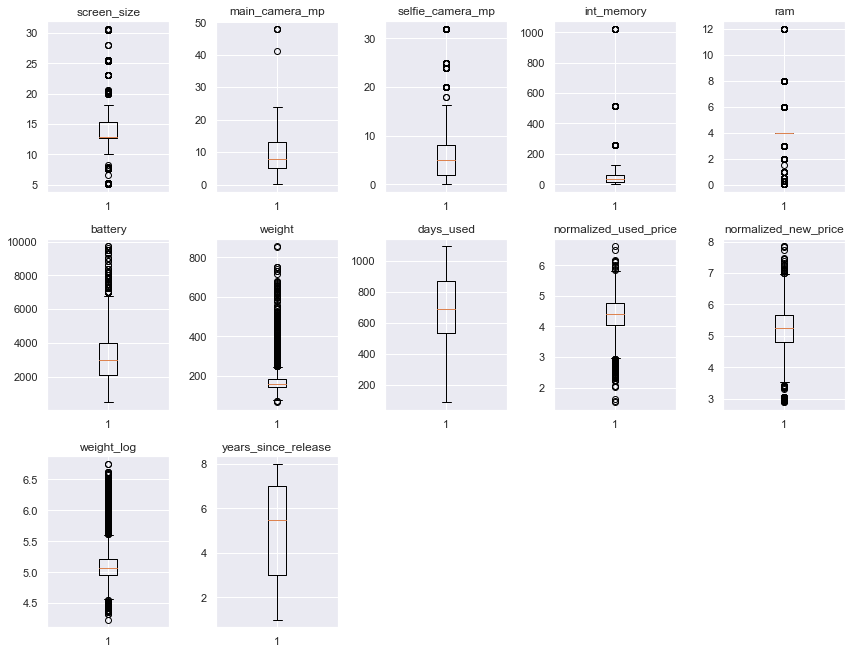

In [46]:
# outlier detection using boxplot
numeric_columns = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 5, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### Observation
Most of the columns have outliers, they are going to be treated before moving forward.

In [47]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [48]:
treat_out_cols = ['screen_size'] ## code to specify the columns for which outliers have to be treated

df2 = treat_outliers_all(df1, treat_out_cols)

In [49]:
treat_out_cols = ['main_camera_mp'] ## code to specify the columns for which outliers have to be treated

df2 = treat_outliers_all(df1, treat_out_cols)

In [50]:
treat_out_cols = ['selfie_camera_mp'] ## code to specify the columns for which outliers have to be treated

df2 = treat_outliers_all(df1, treat_out_cols)

In [51]:
treat_out_cols = ['int_memory'] ##code to specify the columns for which outliers have to be treated

df2 = treat_outliers_all(df1, treat_out_cols)

In [52]:
treat_out_cols = ['ram'] ## code to specify the columns for which outliers have to be treated

df2 = treat_outliers_all(df1, treat_out_cols)

In [53]:
treat_out_cols = ['battery'] ## code to specify the columns for which outliers have to be treated

df2 = treat_outliers_all(df1, treat_out_cols)

In [54]:
treat_out_cols = ['weight'] ## code to specify the columns for which outliers have to be treated

df2 = treat_outliers_all(df1, treat_out_cols)

In [55]:
treat_out_cols = ['normalized_used_price'] ## code to specify the columns for which outliers have to be treated

df2 = treat_outliers_all(df1, treat_out_cols)

In [56]:
treat_out_cols = ['normalized_new_price'] ## code to specify the columns for which outliers have to be treated

df2 = treat_outliers_all(df1, treat_out_cols)

In [57]:
treat_out_cols = ['weight_log'] ##code to specify the columns for which outliers have to be treated

df2 = treat_outliers_all(df1, treat_out_cols)

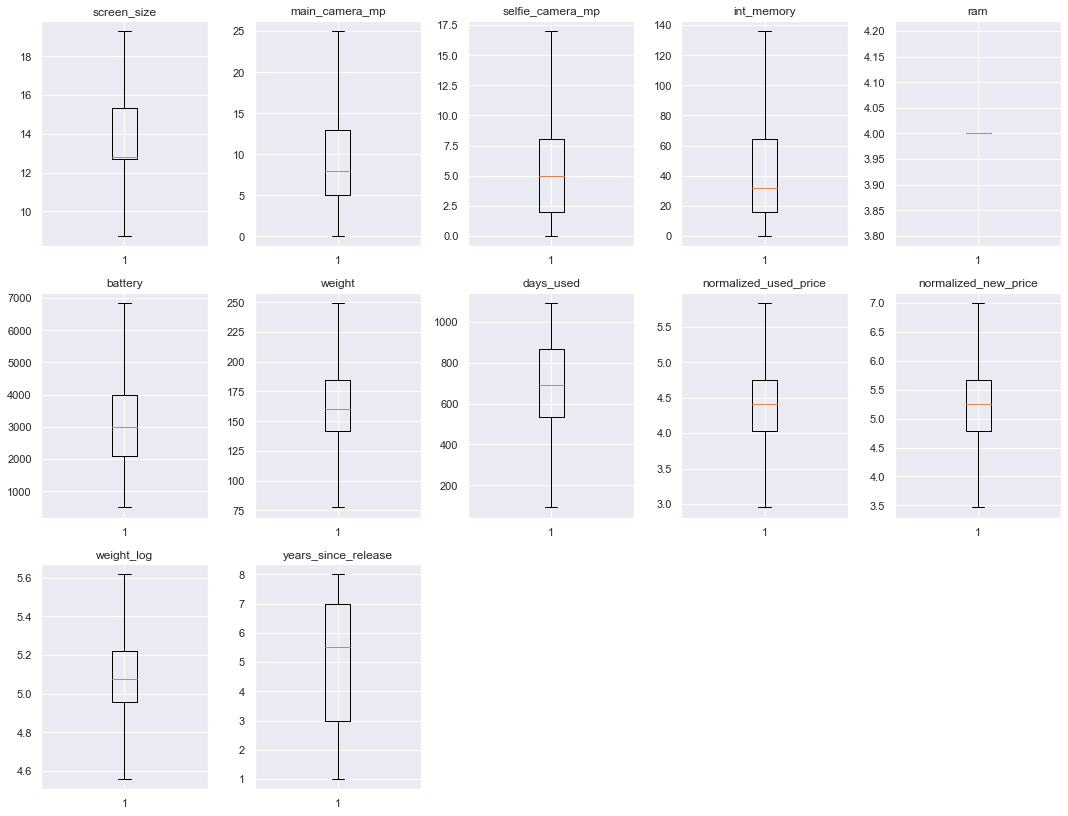

In [58]:
plt.figure(figsize=(15, 15))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 5, i + 1)
    plt.boxplot(df2[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### Observation
All the outliers have been treated now we can move forward on the model building process.

In [59]:
# let's check the statistical summary of the data once
df1.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.551595,2.807499,8.74,12.7,12.83,15.34,19.3
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3454.0,NaN,NaN,NaN,9.425356,4.532445,0.08,5.0,8.0,13.0,25.0
selfie_camera_mp,3454.0,NaN,NaN,NaN,5.96242,5.345927,0.0,2.0,5.0,8.0,17.0
int_memory,3454.0,NaN,NaN,NaN,44.726459,39.070439,0.01,16.0,32.0,64.0,136.0
ram,3454.0,NaN,NaN,NaN,4.0,0.0,4.0,4.0,4.0,4.0,4.0
battery,3454.0,NaN,NaN,NaN,3108.710046,1212.900792,500.0,2100.0,3000.0,4000.0,6850.0


### Data preparation for modeling

In [60]:
## code to define the dependent and independent variables
X = df1.drop(['normalized_used_price'], axis=1)
Y = df1[['normalized_used_price']]

print(X.head())
print()
print(Y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        19.30  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  4.0   3020.0   146.0        127   
1              16.0       128.0  4.0   4300.0   213.0        325   
2               8.0       128.0  4.0   4200.0   213.0        162   
3               8.0        64.0  4.0   6850.0   249.5        345   
4               8.0        64.0  4.0   5000.0   185.0        293   

   normalized_new_price  weight_log  years_since_release  
0              4.715100    4.983607                    1  
1              5.519018    5.361292                    1  
2              5.884631    5.

In [61]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)  ## code to create dummies for independent features

X.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,weight_log,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,14.50,13.0,5.0,64.0,4.0,3020.0,146.0,127,4.715100,4.983607,...,0,0,0,0,0,0,0,0,1,0
1,17.30,13.0,16.0,128.0,4.0,4300.0,213.0,325,5.519018,5.361292,...,0,0,0,0,0,0,0,0,1,1
2,16.69,13.0,8.0,128.0,4.0,4200.0,213.0,162,5.884631,5.361292,...,0,0,0,0,0,0,0,0,1,1
3,19.30,13.0,8.0,64.0,4.0,6850.0,249.5,345,5.630961,5.617149,...,0,0,0,0,0,0,0,0,1,1
4,15.32,13.0,8.0,64.0,4.0,5000.0,185.0,293,4.947837,5.220356,...,0,0,0,0,0,0,0,0,1,0


#### Observation
We had to create dummies because some of the columns were not fit for model building.

In [62]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size= .30, random_state=1) ## code to split the data into train and test in specified ratio

In [63]:
print(x_train.head())

      screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  battery  \
3026        10.29             8.0               0.3        16.0  4.0   1800.0   
1525        15.34            13.0               5.0        32.0  4.0   4050.0   
1128        12.70            13.0               5.0        32.0  4.0   2550.0   
3003        12.83             8.0               5.0        16.0  4.0   3200.0   
2907        12.88            13.0              16.0        16.0  4.0   2900.0   

      weight  days_used  normalized_new_price  weight_log  ...  \
3026   120.0        819              4.796204    4.787492  ...   
1525   225.0        585              5.434595    5.416100  ...   
1128   162.0        727              5.137914    5.087596  ...   
3003   153.0        800              5.189228    5.030438  ...   
2907   160.0        560              5.016220    5.075174  ...   

      brand_name_Spice  brand_name_Vivo  brand_name_XOLO  brand_name_Xiaomi  \
3026                 0               

In [64]:
print(x_test.head())

      screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  battery  \
866         15.24            8.00               2.0        16.0  4.0   3000.0   
957         10.16            3.15               0.3       136.0  4.0   1400.0   
280         15.39            8.00               8.0        32.0  4.0   5000.0   
2150        12.83           13.00              16.0        64.0  4.0   3200.0   
93          15.29           13.00               5.0        32.0  4.0   3500.0   

      weight  days_used  normalized_new_price  weight_log  ...  \
866    206.0        632              5.190788    5.327876  ...   
957    140.0        637              3.884652    4.941642  ...   
280    185.0        329              4.487287    5.220356  ...   
2150   148.0        648              5.639422    4.997212  ...   
93     179.0        216              5.300415    5.187386  ...   

      brand_name_Spice  brand_name_Vivo  brand_name_XOLO  brand_name_Xiaomi  \
866                  0               

In [65]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


### Fit Linear Model

In [66]:
# adding constant to the train data
x_train1 = sm.add_constant(x_train)
# adding constant to the test data
x_test1 = sm.add_constant(x_test) ##code to add contant to the test data

olsmodel1 = sm.OLS(y_train, x_train1) ## code to fit OLS model
olsres1 = olsmodel1.fit()


In [67]:
# let's print the regression summary
print(olsres1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.844
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     266.8
Date:                   Sat, 14 May 2022   Prob (F-statistic):               0.00
Time:                           00:19:15   Log-Likelihood:                 222.09
No. Observations:                   2417   AIC:                            -346.2
Df Residuals:                       2368   BIC:                            -62.46
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


* The coefficients tell us how one unit change in X can affect y.
The sign of the coefficient indicates if the relationship is positive or negative.

- Null hypothesis : Predictor variable is not significant 
- Alternate hypothesis : Predictor variable is significant


* (P > |t|) gives the p-value for each predictor variable to check the null hypothesis.
* If the level of significance is set to 5% (0.05), the p-values greater than 0.05 would indicate that the corresponding predictor variables are not significant.
* However, due to the presence of multicollinearity in our data, the p-values will also change.
* We need to ensure that there is no multicollinearity in order to interpret the p-values.


#### Observation
The R-squared value tells us that our model can explain 84.4% of the variance in the training set.

### Let's check the performance of the model using different metrics.

In [68]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [69]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsres1, x_train1, y_train)
olsmodel1_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.220728,0.174464,0.843938,0.840708,NaN


In [70]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(olsres1, x_test, y_test) ## code to check the performance on test data
olsmodel1_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.227978,0.180795,0.841328,0.833451,NaN


#### Observation
The model is doing better on the trainning set than the testing set.

### TEST FOR MULTICOLLINEARITY

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [72]:
checking_vif(x_train)  ##code to check VIF on train data

,feature,VIF
0,screen_size,5.365131
1,main_camera_mp,2.498135
2,selfie_camera_mp,3.871841
3,int_memory,2.492663
4,ram,50063.849698
5,battery,3.704921
6,weight,188.040814
7,days_used,2.667727
8,normalized_new_price,3.365848
9,weight_log,186.441231


#### Observation
Some of the predictors display multicolinearity.

### Removing Multicolinearity

In [73]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [74]:
col_list = ['screen_size', 'ram', 'weight', 'weight_log', 'years_since_release', 'brand_name_Apple', 'brand_name_Huawei', 'brand_others', 'brand_name_Samsung', 'os_IO'] ## Complete the code to specify the columns with high VIF

res = treating_multicollinearity(x_train1, y_train, col_list) ## code to check the effect on model performance after dropping specified columns from train data
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,ram,0.997435,0.223325
1,brand_name_Samsung,0.840842,0.222953
2,brand_name_Huawei,0.840840,0.222954
3,years_since_release,0.840803,0.222980
4,brand_others,0.840775,0.223000
5,os_IO,0.840775,0.223000
6,brand_name_Apple,0.840608,0.223117
7,weight_log,0.839800,0.223681
8,weight,0.836703,0.225833
9,screen_size,0.834324,0.227472


In [75]:
col_to_drop = ['screen_size', 'ram', 'weight', 'weight_log', 'years_since_release', 'brand_name_Apple', 'brand_name_Huawei', 'brand_name_Others', 'brand_name_Samsung', 'os_IOS'] ## Complete the code to specify the column to drop
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop, na=False)] ## code to specify the train data from which to drop the column specified
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop, na=False)] ## code to specify the test data from which to drop the column specified

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  ['screen_size', 'ram', 'weight', 'weight_log', 'years_since_release', 'brand_name_Apple', 'brand_name_Huawei', 'brand_name_Others', 'brand_name_Samsung', 'os_IOS']


,feature,VIF
0,screen_size,5.365131
1,main_camera_mp,2.498135
2,selfie_camera_mp,3.871841
3,int_memory,2.492663
4,ram,50063.849698
5,battery,3.704921
6,weight,188.040814
7,days_used,2.667727
8,normalized_new_price,3.365848
9,weight_log,186.441231


### Dropping high p-value variables 


In [76]:
# initial list of columns
cols = x_train2.columns.tolist()   ## code to check for p-values on the right dataset

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train2[cols]   # code to check for p-values on the right dataset

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'weight', 'normalized_new_price', 'weight_log', 'brand_name_Apple', 'brand_name_Nokia', 'brand_name_Xiaomi', 'os_iOS', '4g_yes', '5g_yes']


In [77]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [78]:
olsmodel2 = sm.OLS(y_train, x_train3).fit()
print(olsmodel2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     985.2
Date:                   Sat, 14 May 2022   Prob (F-statistic):               0.00
Time:                           00:19:17   Log-Likelihood:                 207.26
No. Observations:                   2417   AIC:                            -386.5
Df Residuals:                       2403   BIC:                            -305.5
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
sc

In [79]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression(olsmodel2,x_train3,y_train) ## code to check performance on train data
olsmodel2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.222086,0.175351,0.842012,0.841091,NaN


In [80]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel2_test_perf = model_performance_regression(olsmodel2, x_test3, y_test) ## code to check performance on test data
olsmodel2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.226804,0.180514,0.842958,0.840807,NaN


### TEST FOR LINEARITY AND INDEPENDENCE

In [81]:
df_pred = pd.DataFrame()

df_pred["Actual_Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted_Values"] = olsmodel2.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsmodel2.resid.values  # residuals

df_pred.head()




,Actual_Values,Fitted_Values,Residuals
0,4.087488,3.787542,0.299946
1,4.448399,4.626467,-0.178068
2,4.315353,4.322253,-0.006900
3,4.282068,4.253135,0.028933
4,4.456438,4.504144,-0.047706


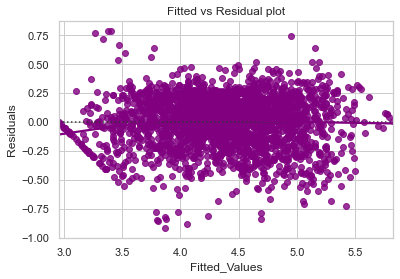

In [82]:
# let us plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted_Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted_Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

#### Observation
The data is not displaying any pattern therefore no linearity.

### TEST FOR NORMALITY

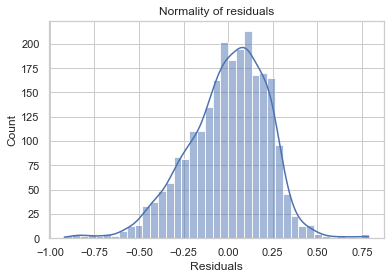

In [83]:
sns.histplot(df_pred['Residuals'], kde=True ) ## code to plot the distribution of residuals
plt.title("Normality of residuals")
plt.show()

The residual terms are close to be normally distributed.

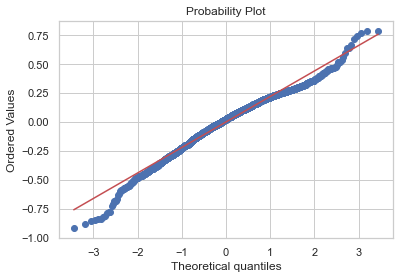

In [84]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred['Residuals'], dist="norm", plot=pylab) ## code check Q-Q plot
plt.show()

* Most of the points are lying on the straight line in QQ plot


The Shapiro-Wilk test can also be used for checking the normality. The null and alternate hypotheses of the test are as follows:


* Null hypothesis - Data is normally distributed.
* Alternate hypothesis - Data is not normally distributed.


In [85]:
stats.shapiro(df_pred['Residuals']) ## code to apply the Shapiro-Wilks test

ShapiroResult(statistic=0.981035590171814, pvalue=1.9819075423203132e-17)

Since p-value < 0.05, the residuals are not normal as per shapiro test.
Strictly speaking - the residuals are not normal. However, as an approximation, we might be willing to accept this distribution as close to being normal

### TEST FOR HOMOSCEDASTICITY

In [86]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred['Residuals'], x_train3) ## code to apply the Goldfeldquandt test
lzip(name, test)

[('F statistic', 1.126554948849573), ('p-value', 0.019761914757059608)]

* Since p-value > 0.05 we can say that the residuals are homoscedastic.

### All the assumptions of linear regression are now satisfied. Let's check the summary of our final mode

### Final Model Summary

In [87]:
olsmodel_final = sm.OLS(y_train, x_train3).fit() ##code to fit the final model
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     985.2
Date:                   Sat, 14 May 2022   Prob (F-statistic):               0.00
Time:                           00:19:19   Log-Likelihood:                 207.26
No. Observations:                   2417   AIC:                            -386.5
Df Residuals:                       2403   BIC:                            -305.5
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
sc

#### Observation
R-squared of the model is 0.842 and adjusted R-squared is 0.841, which shows that the model is able to explain ~84% variance in the data. This is quite good.

In [88]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(olsmodel_final, x_train3, y_train) ## code to check the performance on train data
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.222086,0.175351,0.842012,0.841091,NaN


In [89]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(olsmodel_final, x_test3, y_test) ## code to check performance on test data
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.226804,0.180514,0.842958,0.840807,NaN


## Predictions

### Let's print the linear regression equation.

In [90]:
olsmodel_final.params

screen_size             0.039594
main_camera_mp          0.020356
selfie_camera_mp        0.018370
int_memory              0.000726
ram                    -0.636662
weight                 -0.003966
normalized_new_price    0.391169
weight_log              0.907913
brand_name_Apple        0.299755
brand_name_Nokia        0.063143
brand_name_Xiaomi       0.059097
os_iOS                 -0.265359
4g_yes                  0.035262
5g_yes                  0.065402
dtype: float64

In [91]:
# Let us write the equation of linear regression
Equation = "normalized_used_price ="
print(Equation, end=" ")
for i in range(len(x_train3.columns)):
    if i == 0:
        print(olsmodel_final.params[i], "+", end=" ")
    elif i != len(x_train3.columns) - 1:
        print(
            olsmodel_final.params[i],
            "* (",
            x_train3.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsmodel_final.params[i], "* (", x_train3.columns[i], ")")

normalized_used_price = 0.039594334483269183 + 0.02035637660854495 * ( main_camera_mp ) +  0.018370108155980246 * ( selfie_camera_mp ) +  0.0007262255581730008 * ( int_memory ) +  -0.6366624730822696 * ( ram ) +  -0.003966380352810064 * ( weight ) +  0.39116899137568273 * ( normalized_new_price ) +  0.907912586365403 * ( weight_log ) +  0.29975528815808195 * ( brand_name_Apple ) +  0.06314279736397915 * ( brand_name_Nokia ) +  0.059096619147383345 * ( brand_name_Xiaomi ) +  -0.2653585736116535 * ( os_iOS ) +  0.03526218111741661 * ( 4g_yes ) +  0.06540153995585353 * ( 5g_yes )


#### let's now use the model for making predictions on the test data.

In [92]:
x_train3.columns

Index(['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory',
       'ram', 'weight', 'normalized_new_price', 'weight_log',
       'brand_name_Apple', 'brand_name_Nokia', 'brand_name_Xiaomi', 'os_iOS',
       '4g_yes', '5g_yes'],
      dtype='object')

In [93]:
x_test.columns

Index(['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory',
       'ram', 'battery', 'weight', 'days_used', 'normalized_new_price',
       'weight_log', 'years_since_release', 'brand_name_Alcatel',
       'brand_name_Apple', 'brand_name_Asus', 'brand_name_BlackBerry',
       'brand_name_Celkon', 'brand_name_Coolpad', 'brand_name_Gionee',
       'brand_name_Google', 'brand_name_HTC', 'brand_name_Honor',
       'brand_name_Huawei', 'brand_name_Infinix', 'brand_name_Karbonn',
       'brand_name_LG', 'brand_name_Lava', 'brand_name_Lenovo',
       'brand_name_Meizu', 'brand_name_Micromax', 'brand_name_Microsoft',
       'brand_name_Motorola', 'brand_name_Nokia', 'brand_name_OnePlus',
       'brand_name_Oppo', 'brand_name_Others', 'brand_name_Panasonic',
       'brand_name_Realme', 'brand_name_Samsung', 'brand_name_Sony',
       'brand_name_Spice', 'brand_name_Vivo', 'brand_name_XOLO',
       'brand_name_Xiaomi', 'brand_name_ZTE', 'os_Others', 'os_Windows',
       'os_iOS', '4g

In [94]:
# dropping columns from the test data that are not there in the training data
x_test2 = x_test.drop(
    ['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory',
       'ram', 'weight', 'normalized_new_price',
       'weight_log',
       'brand_name_Apple','brand_name_Nokia',
       'brand_name_Xiaomi','os_iOS', '4g_yes', '5g_yes']
, axis=1
)

In [95]:
# let's make predictions on the test set
y_pred = olsmodel_final.predict(x_test3)

In [96]:
# let's check the RMSE on the train data
rmse1 = np.sqrt(mean_squared_error(y_train, df_pred["Fitted_Values"]))
rmse1

0.22208595622568705

In [97]:
# let's check the RMSE on the test data
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred))
rmse2

0.22680372261736306

In [98]:
# let's check the MAE on the train data
mae1 = mean_absolute_error(y_train, df_pred["Fitted_Values"])
mae1

0.17535097971630315

In [99]:
# let's check the MAE on the test data
mae2 = mean_absolute_error(y_test, y_pred)
mae2

0.18051351338079882

* We can see that RMSE on the train and test sets are comparable therefore the model is not suffering from overfitting
* MAE tells us that the current model is capable to predict normalized used prices with a mean error of 0.18 units on the test data
* Therefore we can conclude that the model olsmodel_final is good for prediction and for inference purpose.

## Actionable Insights and Recommendations

- 

#### These are the effects the predictors could have on the Used devices price by unit : 
#### screen_size             0.039594
#### main_camera_mp          0.020356
#### selfie_camera_mp        0.018370
#### int_memory              0.000726
#### ram                    -0.636662
#### weight                 -0.003966
#### normalized_new_price    0.391169
#### weight_log              0.907913
#### brand_name_Apple        0.299755
#### brand_name_Nokia        0.063143
#### brand_name_Xiaomi       0.059097
#### os_iOS                 -0.265359
#### 4g_yes                  0.035262
#### 5g_yes                  0.065402

#### Taking that in consideration we can make all the necessary adjustments to only collect devices that would good for profit.

#### Recommendation for the company is to market the features that mostly attract customers in order to attract them on considering to buy used phones. The futres to be selected have to be well observed in example a good enogh ram to attract a customer but not to high to make the price not affordable.
